In [85]:
# package imports
import pandas as pd
import numpy as np 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(2020)

# temp

In [162]:
def f_args(*args):
    print(args, type(args))
#     a = *args
#     a
    print("Print {}".format(*args))
    
f_args(12,13,14)

(12, 13, 14) <class 'tuple'>
Print 12


# 数据结构

pandas的数据结构有Series和DataFrame。Series

Python中的list、NumPy中Narray、Pandas中Series、DataFrame

1. list是python的内置数据类型，list中的数据类型不必相同的
2. Narray所存放的数据类型必须全部相同、会尽可能将输入数据视为多维、效率比list高
3. Series无论是输入还是输出，数据都是一维,数据类型不必相同
4. DataFrame是一个表格型的数据结构，它含有一组有序的列，每列可以是不同的值类型。DataFrame的每一列可以看做是一个Series

## Series

Series与普通一维数组的区别在于，它多了一组与之相关的数据标签(比如：index)

### 创建

series通常通过传入一组list创建，若不指定索引，则会自动创建一个0到N-1（N为数组长度）的整数型索引

In [108]:
se = pd.Series([4, 7, -5, 3], index=['a', 'b', 'c', 'd'])
se
type(se1.values)
type(se1.index)
se.name = 'name_test'
se.index.name = 'in'
se

a    4
b    7
c   -5
d    3
dtype: int64

numpy.ndarray

pandas.core.indexes.base.Index

in
a    4
b    7
c   -5
d    3
Name: name_test, dtype: int64

### 索引
Series索引方式主要有以下三种，索引值由index的数据类型决定，既可以为整数，也可以为str
1. 像数组一样
2. 传入一个list
3. 布尔运算

In [31]:
#用数组方式索引
se['a']
#用切片
se['d':'a']
#布尔运算
se[se>3] #等价于se[se.values>3]

4

Series([], Name: name_test, dtype: int64)

in
a    4
b    7
Name: name_test, dtype: int64

### 修改和删除

In [34]:
#修改
se['a'] = 8
se
#增加
se['e'] = 10
se
#删除
se.drop('a')

in
a     8
b     7
c    -5
d     3
e    10
Name: name_test, dtype: int64

in
a     8
b     7
c    -5
d     3
e    10
Name: name_test, dtype: int64

in
b     7
c    -5
d     3
e    10
Name: name_test, dtype: int64

### 属性
对于一个Series，其中最常用的属性为值（values），索引（index），名字（name），类型（dtype）  

注意：index也有name属性，别搞混了

更多属性：https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

In [39]:
se.values
se.index
se.name
se.dtype

array([ 8,  7, -5,  3, 10])

Index(['a', 'b', 'c', 'd', 'e'], dtype='object', name='in')

'name_test'

dtype('int64')

## DataFrame
DataFrame是一个二维的表结构，它含有一组有序的列。DataFrame既有行索引又有列索引，它可以被看做由Series组成的字典。

### 创建
最常见的方法就是直接传入一个由等长列表或数组组成的字典。若不指定行索引，则会自动创建一个0到N-1（N为数组长度）的整数型索引
若不指定列索引，则字典的键作为列索引

In [137]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', np.nan],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
df = pd.DataFrame(data)
df


,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,NaN,2003,3.2


### 索引

索引方法繁多，且功能重叠，这里介绍最常用的三种：

1. []操作符
2. loc方法、iloc方法
3. 常用索引型函数where、query

#### []操作符

[]操作符常用于列选择，尽量避免行的选择,行选择用loc较好

In [138]:
#单行索引
df_1_2 =  df[1:2] #必须用切片，不能df[1]，所以用[]操作符做行索引很不舒服
df_1_2
type(df_1_2)

#多行索引，多行索引出来还是DataFrame
df[1:3]


#单列索引，单列索引出来就是一个Series
df_state = df['state']
type(df_state)

#多列索引
df[['state','year']]


#函数式索引
df[lambda x:['state', 'year']] #[]中使用的函数，传入参数就是前面的df


#布尔索引
df[df['year']==2001]
df[df['year'].isin([2001,2002])]
df[df['state'].notna()]


,state,year,pop
1,Ohio,2001,1.7


pandas.core.frame.DataFrame

,state,year,pop
1,Ohio,2001,1.7
2,Ohio,2002,3.6


pandas.core.series.Series

,state,year
0,Ohio,2000
1,Ohio,2001
2,Ohio,2002
3,Nevada,2001
4,Nevada,2002
5,NaN,2003


,state,year
0,Ohio,2000
1,Ohio,2001
2,Ohio,2002
3,Nevada,2001
4,Nevada,2002
5,NaN,2003


,state,year,pop
1,Ohio,2001,1.7
3,Nevada,2001,2.4


,state,year,pop
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


#### loc方法、iloc方法

1. loc是对行标签、列标签进行索引；iloc是对行号、列号进行索引
2. 在loc中使用的切片全部包含右端点！在iloc中的切片不包含！对此我也很无语呀~
3. 本质上loc中能传入的只有布尔列表和索引子集构成的列表，只要把握这个原则就很容易理解上面那些操作。iloc中接收的参数只能为整数或整数列表，不能使用布尔索引


In [85]:
#单行索引，单行索引出来就是一个Series
df_loc_1 =  df.loc[1]
df_loc_1
df.iloc[1] #这里因为行标签和行号相同，所以取值一样
type(df_loc_1)

#多行索引，多行索引出来还是DataFrame
df.loc[1:3]


#单列索引
df.loc[:,'state']
df.iloc[:,0]


#多列索引
df.loc[:,['state','year']]
df.loc[:, 'state':'year'] #与上面等价

df.iloc[:,0]
df.iloc[:,0:2]

#行列混合索引
df.loc[1:2,['state','year']]
df.iloc[1:3,0:2]

#函数式索引
df.loc[lambda x:x['year']==2001] #loc中使用的函数，传入参数就是前面的df


#布尔索引
df.loc[df['year']==2001]


state    Ohio
year     2001
pop       1.7
Name: 1, dtype: object

state    Ohio
year     2001
pop       1.7
Name: 1, dtype: object

pandas.core.series.Series

,state,year,pop
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4


0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5       NaN
Name: state, dtype: object

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5       NaN
Name: state, dtype: object

,state,year
0,Ohio,2000
1,Ohio,2001
2,Ohio,2002
3,Nevada,2001
4,Nevada,2002
5,NaN,2003


,state,year
0,Ohio,2000
1,Ohio,2001
2,Ohio,2002
3,Nevada,2001
4,Nevada,2002
5,NaN,2003


0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5       NaN
Name: state, dtype: object

,state,year
0,Ohio,2000
1,Ohio,2001
2,Ohio,2002
3,Nevada,2001
4,Nevada,2002
5,NaN,2003


,state,year
1,Ohio,2001
2,Ohio,2002


,state,year
1,Ohio,2001
2,Ohio,2002


,state,year,pop
1,Ohio,2001,1.7
3,Nevada,2001,2.4


,state,year,pop
1,Ohio,2001,1.7
3,Nevada,2001,2.4


#### 常用索引型函数
这里仅介绍用的较多的where、query

In [89]:
#where
df.where(df['state']=='Ohio') #不满足条件的行全部被设置为NaN

#query，类似于数据库的查询语法
#query函数中的布尔表达式中，这些符号都是合法的：行列索引名、字符串、and/not/or/&/|/~/not in/in/==/!=、四则运算符
df.query('(pop > 1.8) & year in [2001, 2002]')


,state,year,pop
0,Ohio,2000.0,1.5
1,Ohio,2001.0,1.7
2,Ohio,2002.0,3.6
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN


,state,year,pop
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


#### 索引设定

reindex
1. reindex的作用是按照原有的列进行重新生成一个新的df。原index并没有发生改变，而因为'2'和'3'是不存在的，所以使用了Nan填充，这个值的内容可以自己填充，可以改为默认填充0或者任意你想要的数据。可以选择缺失值的填充方法：fill_value和method（bfill/ffill/nearest）

    注意和df.columns的区别: reindex会重新排列数据，df.columns只是改变列名不会移动数据

In [52]:
result= pd.DataFrame(np.arange(9).reshape((3, 3)), index=['1', '5', '6'], columns=['c1', 'c2', 'c3'])
result
# result.reindex(index=['1','2','3'])


result.reindex(columns=['c2', 'c3', 'c1'])

result.columns = ['c2', 'c3', 'c1']
result

,c1,c2,c3
1,0,1,2
5,3,4,5
6,6,7,8


,c2,c3,c1
1,1,2,0
5,4,5,3
6,7,8,6


,c2,c3,c1
1,0,1,2
5,3,4,5
6,6,7,8


reset_index

reset_index的作用是重新设置dataframe的index，范围为0~len（df）。与reindex的区别是，reset_index改变了index，reindex没有改变。这一点从命名上也可以看出来

In [54]:
result.reset_index()

#会删除原来的Index，直接替换为range(0.len(result))
result.reset_index(drop=True)

,index,c2,c3,c1
0,1,0,1,2
1,5,3,4,5
2,6,6,7,8


,c2,c3,c1
0,0,1,2
1,3,4,5
2,6,7,8


set_index

将keys列设置为index(keys必须为列名)

In [60]:
result.set_index('c1')

,c2,c3
c1,,
2,0,1
5,3,4
8,6,7


### 修改

对某一列进行修改，用[]操作符较好，因为方便

对某一行某一列进行修改，用loc、iloc较好，因为用[]操作符可能修改的只是副本。
具体官方解释：https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [120]:
#列修改
df['tem'] = 0
df

#行列修改
df.loc[:1,'tem'] = 2
df

df['tem'][:1] = 1 #会出现警告
df

,state,year,pop,tem
0,Ohio,2000,1.5,0
1,Ohio,2001,1.7,0
2,Ohio,2002,3.6,0
3,Nevada,2001,2.4,0
4,Nevada,2002,2.9,0
5,NaN,2003,3.2,0


,state,year,pop,tem
0,Ohio,2000,1.5,2
1,Ohio,2001,1.7,2
2,Ohio,2002,3.6,0
3,Nevada,2001,2.4,0
4,Nevada,2002,2.9,0
5,NaN,2003,3.2,0


/Users/maowei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,state,year,pop,tem
0,Ohio,2000,1.5,1
1,Ohio,2001,1.7,2
2,Ohio,2002,3.6,0
3,Nevada,2001,2.4,0
4,Nevada,2002,2.9,0
5,NaN,2003,3.2,0


### 删除

In [121]:
#删除指定行列
#drop，inplace代表是否在原对象基础上进行修改，默认是False，即创建新的对象进行修改，原对象不变，与深拷贝和浅拷贝有些类似
df.drop(columns='tem', inplace = True)
df

df.drop(index=5, inplace = True)
df

#删除重复元素
#可选参数keep默认为first，即保留重复元素第一个，若为last，则保留最后一个，若为False，则全部删除
df.drop_duplicates('year', keep='first', inplace=True)
df

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,NaN,2003,3.2


,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6


### 属性
对于一个DataFrame，其中最常用的属性为值（values），索引（index），维度(shape)，列名（columns），类型（dtype)

In [157]:
df.columns
type(df.columns)
df.index
df.shape
df.dtypes

Index(['carat', 'color', 'depth', 'price', 'depth_cuts', 'price_unit'], dtype='object')

pandas.core.indexes.base.Index

RangeIndex(start=0, stop=53940, step=1)

(53940, 6)

carat          float64
color           object
depth          float64
price            int64
depth_cuts    category
price_unit     float64
dtype: object

## 常用函数

### apply

apply函数是pandas里面所有函数中自由度最高的函数。apply接受函数f1，f1作用对象是Series，根据axis来确定是行Series，还是列Series

pandas里面的axis永远代表的是处理方向不是聚合方向，你apply对列迭代，那么你聚合方向就是行方向。按index进行聚合, 聚合的结果的index还是原来的index, 也就是说把不同的列聚合到一起; 按columns聚合, 聚合的结果的columns还是原来的columns,也就是把不同的行聚合到一起.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html



In [135]:
df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
df
#对行进行处理，每一行相加
df.apply(np.sum, axis=0)

#对列进行处理，每一列相加
df.apply(np.sum, axis=1)

,A,B
0,4,9
1,4,9
2,4,9


A    12
B    27
dtype: int64

0    13
1    13
2    13
dtype: int64

# 常用操作（分组、变形、合并）

## 分组

分组通常是一个SAC过程  
SAC指的是分组操作中的split-apply-combine过程
其中split指基于某一些规则，将数据拆成若干组，apply是指对每一组独立地使用函数，combine指将每一组的结果组合成某一类数据结构

在apply过程中，我们实际往往会遇到四类问题：  
整合（Aggregation）——即分组计算统计量（如求均值、求每组元素个数）

变换（Transformation）——即分组对每个单元的数据进行操作（如元素标准化）

过滤（Filtration）——即按照某些规则筛选出一些组（如选出组内某一指标小于50的组）

综合问题——即前面提及的三种问题的混合

### groupBy（SAC中的S）
https://www.yiibai.com/pandas/python_pandas_groupby.html

In [119]:
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', np.nan, 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}

df = pd.DataFrame(ipl_data)
df

#经过groupby后会生成一个groupby对象，该对象本身不会返回任何东西，只有当相应的方法被调用才会起作用
group_year =  df.groupby('Year')

#对于groupby函数而言，分组的依据是非常自由的，只要是与数据框长度相同的列表即可，同时支持函数型分组
np.random.choice(['a','b','c'],df.shape[0])
df.groupby(np.random.choice(['a','b','c'],df.shape[0])).get_group('a')

#函数型分组
df.groupby(lambda x:'奇数行' if df.index.get_loc(x)%2==1 else '偶数行').get_group('奇数行')

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,NaN,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


array(['b', 'b', 'b', 'c', 'a', 'b', 'c', 'b', 'c', 'c', 'b', 'b'],
      dtype='<U1')

,Team,Rank,Year,Points
1,Riders,2,2015,789
7,Kings,1,2017,788
11,Riders,2,2017,690


,Team,Rank,Year,Points
1,Riders,2,2015,789
3,Devils,3,2015,673
5,kings,4,2015,812
7,Kings,1,2017,788
9,Royals,4,2014,701
11,Riders,2,2017,690


#### 索引groups

In [94]:
#索引全部groups，返回Dict
group_year.groups

#索引单个group，返回Dataframe
group_year.get_group(2014)

#索引单列
group_year['Rank'].mean()>1


#遍历groups
for name,group in group_year:
    name
    group

{2014: Int64Index([0, 2, 4, 9], dtype='int64'),
 2015: Int64Index([1, 3, 5, 10], dtype='int64'),
 2016: Int64Index([6, 8], dtype='int64'),
 2017: Int64Index([7, 11], dtype='int64')}

,Team,Rank,Points
0,Riders,1,876
2,Devils,2,863
4,Kings,3,741
9,Royals,4,701


Year
2014    True
2015    True
2016    True
2017    True
Name: Rank, dtype: bool

2014

,Team,Rank,Year,Points
0,Riders,1,2014,876
2,Devils,2,2014,863
4,Kings,3,2014,741
9,Royals,4,2014,701


2015

,Team,Rank,Year,Points
1,Riders,2,2015,789
3,Devils,3,2015,673
5,kings,4,2015,812
10,Royals,1,2015,804


2016

,Team,Rank,Year,Points
6,NaN,1,2016,756
8,Riders,2,2016,694


2017

,Team,Rank,Year,Points
7,Kings,1,2017,788
11,Riders,2,2017,690


#### 常用方法

https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html

In [81]:
#对分组对象使用head函数，返回的是每个组的前几行，而不是数据集前几行
group_year.head(1)



group_year.size()

#Compute count of group, excluding missing values.
group_year.count()

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
6,NaN,1,2016,756
7,Kings,1,2017,788


Year
2014    4
2015    4
2016    2
2017    2
dtype: int64

,Team,Rank,Points
Year,,,
2014,4,4,4
2015,4,4,4
2016,1,2,2
2017,2,2,2


### Apply（SAC中的A）

#### 聚合（Aggregation）

所谓聚合就是把一堆数，变成一个标量，因此mean/sum/size/count/std/var/sem/describe/first/last/nth/min/max都是聚合函数，也可以使用自定义函数

In [103]:
group_year['Points'].agg('mean')

#同时使用多个聚合函数
group_year.agg(['sum','mean','std'])

#利用元组进行重命名
group_year.agg([('rename_sum','sum'),('rename_mean','mean')])

#指定哪些函数作用哪些列
group_year.agg({'Rank':['mean','max'],'Points':'var'})

#自定义函数
#agg函数的传入是分组逐列进行+自定义函数，就可以做许多事情
'自定义函数'
group_year['Rank'].agg(lambda x:x.max()-x.min())

Year
2014    795.25
2015    769.50
2016    725.00
2017    739.00
Name: Points, dtype: float64

Rank                Points                   
      sum mean       std    sum    mean        std
Year                                              
2014   10  2.5  1.290994   3181  795.25  87.439026
2015   10  2.5  1.290994   3078  769.50  65.035888
2016    3  1.5  0.707107   1450  725.00  43.840620
2017    3  1.5  0.707107   1478  739.00  69.296465

Rank                 Points            
     rename_sum rename_mean rename_sum rename_mean
Year                                              
2014         10         2.5       3181      795.25
2015         10         2.5       3078      769.50
2016          3         1.5       1450      725.00
2017          3         1.5       1478      739.00

Rank           Points
     mean max          var
Year                      
2014  2.5   4  7645.583333
2015  2.5   4  4229.666667
2016  1.5   2  1922.000000
2017  1.5   2  4802.000000

'自定义函数'

Year
2014    3
2015    3
2016    1
2017    1
Name: Rank, dtype: int64

#### 过滤（Filteration）

filter函数是用来筛选某些组的（务必记住结果是组的全体），传入的值应当是布尔标量

相比不分组直接过滤，区别是，如果这个组有一个不满足，整个组都被过滤掉了

In [118]:
group_year.filter(lambda x: (x['Points']> 680).all())

,Team,Rank,Year,Points
0,Riders,1,2014,876
2,Devils,2,2014,863
4,Kings,3,2014,741
6,NaN,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701
11,Riders,2,2017,690


#### 变换（Transformation）

transform传入的值是一个函数，函数作用对象是各个组的列，并且返回值需要与列长完全一致。如果返回了标量值，那么组内的所有元素会被广播为这个值。

transform与Aggregation的区别在于，transform返回一列值，Aggregation返回一个值

In [123]:
group_year.transform(lambda x:x-x.min())

group_year.transform(lambda x:x.mean())

,Rank,Points
0,0,175
1,1,116
2,1,162
3,2,0
4,2,40
5,3,139
6,0,62
7,0,98
8,1,0
9,3,0


,Rank,Points
0,2.5,795.25
1,2.5,769.50
2,2.5,795.25
3,2.5,769.50
4,2.5,795.25
5,2.5,769.50
6,1.5,725.00
7,1.5,739.00
8,1.5,725.00
9,2.5,795.25


#### 综合

apply传入的值是函数。apply函数像是其他分组函数的综合体，可以实现其他函数的所有功能。正因为如此，在所有的分组函数中，apply是应用最为广泛的。但是正因为它的灵活性，导致它的效率没有那些具有特定功能的函数的效率高，比如：transform、aggregation

In [126]:
#返回值是列表
group_year[['Rank','Points']].apply(lambda x:x-x.min())

#返回值是标量
group_year[['Rank','Points']].apply(lambda x:x.mean())

,Rank,Points
0,0,175
1,1,116
2,1,162
3,2,0
4,2,40
5,3,139
6,0,62
7,0,98
8,1,0
9,3,0


,Rank,Points
Year,,
2014,2.5,795.25
2015,2.5,769.50
2016,1.5,725.00
2017,1.5,739.00


## 变形

# 数据类型

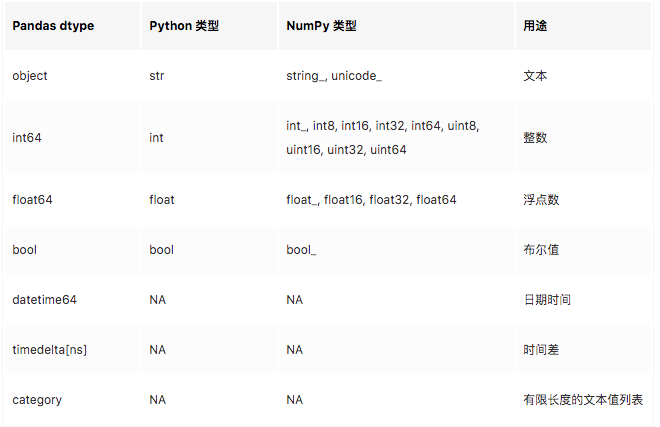
https://juejin.im/post/5acc36e66fb9a028d043c2a5

https://www.pypandas.cn/docs/user_guide/timeseries.html

In [131]:
df['year'].dtype

df['year'] = df['year'].astype(np.int8)

df.info()

dtype('int64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   5 non-null      object 
 1   year    6 non-null      int8   
 2   pop     6 non-null      float64
dtypes: float64(1), int8(1), object(1)
memory usage: 230.0+ bytes


In [24]:
6/2

3.0

## 合并

1. merge以列为连接点，jion以index为连接点。通过设置函数里的参数，可以使两个功能相同
https://zhuanlan.zhihu.com/p/45442554


In [15]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                'A': ['A0', 'A1', 'A2', 'A3']})

left
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                 'C': ['C0', 'C1', 'C2', 'C3']})
right

result = pd.merge(left, right, how='left', on='key1')
result

,key1,A
0,K0,A0
1,K0,A1
2,K1,A2
3,K2,A3


,key1,C
0,K0,C0
1,K1,C1
2,K1,C2
3,K2,C3


,key1,A,C
0,K0,A0,C0
1,K0,A1,C0
2,K1,A2,C1
3,K1,A2,C2
4,K2,A3,C3


### 平移

shift https://blog.csdn.net/kizgel/article/details/78333833

### 其他

In [5]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
df1 = pd.DataFrame(data)
col='mao'
df1[col+'_num'] = 1
df1
# null_age = df1[df1['pop'].notna()]
# type(null_age.iloc[:, :2])

,state,year,pop,mao_num
0,Ohio,2000,1.5,1
1,Ohio,2001,1.7,1
2,Ohio,2002,3.6,1
3,Nevada,2001,2.4,1
4,Nevada,2002,2.9,1
5,Nevada,2003,3.2,1


In [ ]:
df = pd.read_csv('train.csv')

age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

# 乘客分成已知年龄和未知年龄两部分
known_age = age_df[age_df['Age'].notnull()]
unknown_age = age_df[age_df['Age'].isnull()]

# y即目标年龄
y = known_age[:, 0]

## 统计

# Numpy 

## random随机
1. https://blog.csdn.net/vicdd/article/details/52667709


### 随机种子
设置全局随机种子，就不用单独给每个函数设置了

https://blog.csdn.net/weixin_41712499/article/details/82083517

In [21]:
np.random.seed(0)

In [23]:
for i in range(6):
    print(np.random.rand())

0.4375872112626925
0.8917730007820798
0.9636627605010293
0.3834415188257777
0.7917250380826646
0.5288949197529045


In [5]:
np.array([[[1], [1]], [2,2,2]])

array([list([[1], [1]]), list([2, 2, 2])], dtype=object)

In [73]:
# type(frame1.loc[0,'state'])
# frame1.loc[int('0'),'state']
frame1.loc[1,'aa'] = frame1.loc[int(),'aa']
frame1
# frame2.loc[frame1.loc[0,'state'],'year']

'5'

In [60]:
data = [[1,2,3],[4,5,6]]
index = ['d','e']
columns=['a','b','c']
df = pd.DataFrame(data=data, index=index, columns=columns)
df

,a,b,c
d,1,2,3
e,4,5,6


In [62]:
df.loc['d','a']

1

In [ ]:
frame1['year'] = 0
for i in frame1.index:
#     print(i)
#     print(frame1.loc[i,'state'])
#     print(frame2.loc[i,'year'])
    frame2.loc[frame1.loc[i,'state'], 'year']
#     frame1[i,'year'] = frame2[frame1.loc[i,'state'], 'year']
frame1

In [87]:
data = pd.DataFrame(np.arange(16).reshape(4,4),index=list('abcd'),columns=list('ABCD'))
data_np = data.as_matrix()
x = data_np[:, 1:]
data['A']

/Users/maowei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


a     0
b     4
c     8
d    12
Name: A, dtype: int64

In [92]:
from sklearn import preprocessing
import numpy as np
x = np.array([ 1., -1.,  2., 2])
x.reshape(-1,1)

array([[ 1.],
       [-1.],
       [ 2.],
       [ 2.]])

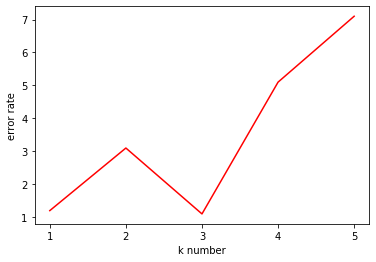

In [70]:
x1 = list(range(1,6))
y1=[1.2,3.1,1.1,5.1,7.1]

plt.xticks(x1)
plt.xlabel('k number')
plt.ylabel('error rate')
plt.plot(x1, y1,'r')
plt.show()

In [104]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
c = np.concatenate((a,b))
c.shape[0]

4

In [59]:
for c in dict1:
    print(c,':',dict1[c])
list(dict1.values()).index("runoob")
# dict1(dict1.keys())

name : runoob
2 : 1
2 : www.runoob.com


0

In [44]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002, 2003],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame.index.name = 'iname'; frame.columns.name = 'cname'
frame

cname,state,year,pop
iname,,,
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


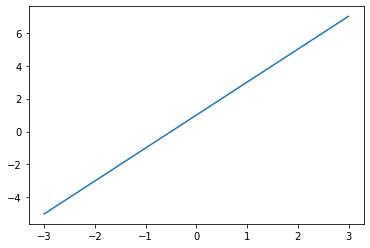

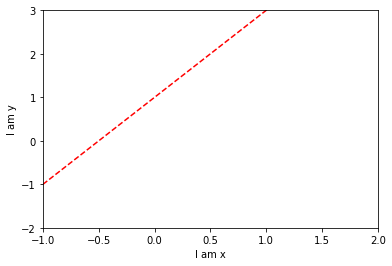

In [61]:

x=np.linspace(-3,3,2)
y=2*x+1
plt.figure()
plt.plot(x,y)

x1=np.linspace(-3,3,5)
y1=2*x1+1
plt.figure()
plt.plot(x1,y1,color='red',linestyle='--')
plt.xlim((-1, 2))
plt.ylim((-2, 3))
plt.xlabel('I am x')
plt.ylabel('I am y')

plt.show()

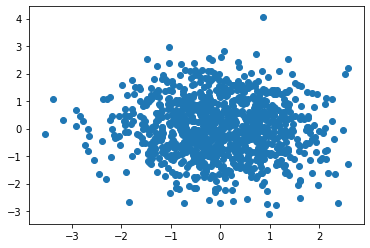

In [62]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)
plt.show()


Shape of sample = (100, 3)


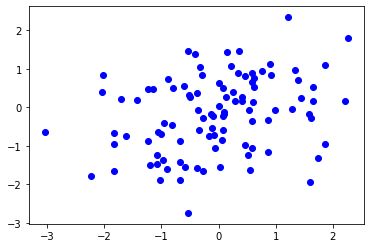

In [77]:
def make_dist(mean, cov, dist_num, n = 100, seed = 123):
    nr.seed(seed)
    sample = nr.multivariate_normal(mean, cov, n) # Compute the 2-d Normally distributed data
    sample = np.column_stack((sample, np.array([dist_num]*n))) ## Add the distribution identifier
    print('Shape of sample = ' + str(sample.shape))
    return(sample)

cov = np.array([[1.0, 0.4], [0.4, 1.0]])
mean = np.array([0.0, 0.0])
sample1 = make_dist(mean, cov, 1)
plt.scatter(sample1[:,0], sample1[:,1], color = 'blue')

In [101]:
s = np.random.normal(0, 1, 100)
s

array([ 0.41956768,  0.20692752, -2.25153499, -0.58897055,  1.13115191,
        0.13507767, -1.21226896,  0.69077727, -0.47912295,  0.36005073,
        0.37692011, -1.1186956 ,  0.78982803, -1.0075088 , -1.30578587,
       -0.88282899, -0.34609003,  0.10940316, -0.77258373,  0.74481931,
        0.25146418, -0.69479822,  0.88899292,  1.16106836, -0.0986847 ,
       -0.21498304, -1.77377135, -0.40751259, -0.29150671,  0.24537941,
       -0.16842643,  0.24402694,  1.53409029, -0.5299141 , -0.49097228,
       -1.30916531, -0.00866047,  0.97681298, -1.75107035, -0.66585697,
        0.0359405 ,  0.85010288,  0.38287024,  0.32546363, -0.22431279,
        0.48187426,  1.01430388, -1.70899178,  0.7285354 , -0.09875981,
       -0.52998886, -2.44307579, -1.38035132,  1.69805899, -0.68854853,
       -1.08476877, -0.45642596, -0.74514722,  0.12435863,  1.51697368,
       -0.58661595,  0.15429005, -1.14723714,  1.52016644,  0.18904344,
       -1.08181912,  0.90430622,  1.19998765,  0.16145636, -1.63

<BarContainer object of 8 artists>

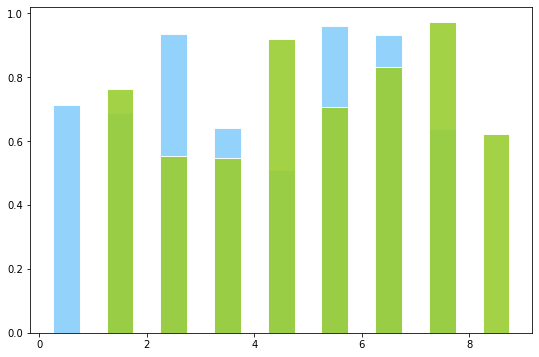

In [99]:
plt.figure(figsize=(9,6))
n = 8
X = np.arange(n)+1 #X是1,2,3,4,5,6,7,8,柱的个数
#uniform均匀分布的随机数，normal是正态分布的随机数，0.5-1均匀分布的数，一共有n个
Y1 = np.random.uniform(0.5,1.0,n)
Y2 = np.random.uniform(0.5,1.0,n)
plt.bar(X-0.5, Y1, alpha=0.9, width = 0.5, facecolor = 'lightskyblue', edgecolor = 'white', label='one', lw=1)
plt.bar(X+0.5, Y2, alpha=0.9, width = 0.5, facecolor = 'yellowgreen', edgecolor = 'white', label='second', lw=1)

# 常用函数

In [9]:
df = pd.DataFrame({'Col1': [10, 20, 15, 30, 45],
                   'Col2': [13, 23, 18, 33, 48],
                   'Col3': [17, 27, 22, 37, 52]})


df

,Col1,Col2,Col3
0,10,13,17
1,20,23,27
2,15,18,22
3,30,33,37
4,45,48,52


## map

In [34]:
s = pd.Series(['cat', 'dog', np.nan, 'rabbit'])
s
s.map({'cat': 'kitten', 'dog': 'puppy'})

['xx']

0       cat
1       dog
2       NaN
3    rabbit
dtype: object

## apply

In [33]:
df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
df
df.apply(np.sum, axis = 0) 

,A,B
0,4,9
1,4,9
2,4,9


A    12
B    27
dtype: int64

## cut

In [15]:
df=pd.DataFrame(np.arange(20).reshape(4,5),index=['ind0','ind1','ind2','ind3'],columns=['col0','col1','col2','col3','col4'])
bin = [0,2,5,9]
#label=false就返回编号
df['bin'] = pd.cut(np.array([1, 7, 5, 4]), 3, labels = False)
df

,col0,col1,col2,col3,col4,bin
ind0,0,1,2,3,4,0
ind1,5,6,7,8,9,2
ind2,10,11,12,13,14,1
ind3,15,16,17,18,19,1


## copy
'='是浅拷贝，改变拷贝的值，原值也会跟着改。copy是深拷贝

In [27]:
df=pd.DataFrame(np.arange(20).reshape(4,5),index=['ind0','ind1','ind2','ind3'],columns=['col0','col1','col2','col3','col4']).copy()
df.info()
'#' * 50
df['col-col1'] = df['col0'].apply(str).str.cat(df['col1'].apply(str), '-')

df.info()

df['test']  = df['col0'] - df['col1']
df

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, ind0 to ind3
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   col0    4 non-null      int64
 1   col1    4 non-null      int64
 2   col2    4 non-null      int64
 3   col3    4 non-null      int64
 4   col4    4 non-null      int64
dtypes: int64(5)
memory usage: 192.0+ bytes


'##################################################'

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, ind0 to ind3
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   col0      4 non-null      int64 
 1   col1      4 non-null      int64 
 2   col2      4 non-null      int64 
 3   col3      4 non-null      int64 
 4   col4      4 non-null      int64 
 5   col-col1  4 non-null      object
dtypes: int64(5), object(1)
memory usage: 224.0+ bytes


,col0,col1,col2,col3,col4,col-col1,test
ind0,0,1,2,3,4,0-1,-1
ind1,5,6,7,8,9,5-6,-1
ind2,10,11,12,13,14,10-11,-1
ind3,15,16,17,18,19,15-16,-1


## melt、pivot

In [13]:
df = pd.DataFrame({'a':[1,2],'b':[4,5], 'c':[7,8]})
# df = pd.DataFrame({'a':[1,2,3,4],'b':[4,5,6,7]})
df.reset_index(drop = True)
df_melt = df.melt()
df_melt
df_melt.pivot(columns='variable')


,a,b,c
0,1,4,7
1,2,5,8


,variable,value
0,a,1
1,a,2
2,b,4
3,b,5
4,c,7
5,c,8


value          
variable     a    b    c
0          1.0  NaN  NaN
1          2.0  NaN  NaN
2          NaN  4.0  NaN
3          NaN  5.0  NaN
4          NaN  NaN  7.0
5          NaN  NaN  8.0

In [3]:
df.idMax()

AttributeError: 'DataFrame' object has no attribute 'idMax'

In [14]:
# y = np.log(-15+1)
# y
np.exp(8)-1

2979.9579870417283

In [ ]:
# df = df.astype({'col1': 'int32'})
df.info()

In [35]:
df['uid'] = range(2)

In [11]:
np.log(2.7)

0.9932517730102834